In [123]:
import os

# Anzeigen des aktuellen Arbeitsverzeichnisses
current_working_directory = os.getcwd()
print("Aktuelles Arbeitsverzeichnis:", current_working_directory)


Aktuelles Arbeitsverzeichnis: /Users/henrikfliegel/Desktop/MD


## Install Dependencies

In [ ]:
pip install pandas

In [ ]:
pip install openpyxl


In [ ]:
pip install matplotlib

In [ ]:
pip install statsmodels

In [ ]:
pip install scikit-learn

In [ ]:
pip install tensorflow

## Load Data

In [51]:
import pandas as pd

# Laden der Excel-Datei
excel_file = pd.ExcelFile('Fact_Forecast_GJ2023.XLSX')

# Excel-Datei enthält mehrere Tabellenblätter
sheet_names = excel_file.sheet_names  # Liste aller Tabellenblattnamen

print(sheet_names)

# Laden jedes Tabellenblatts in ein eigenes DataFrame
dataframes = {sheet_name: excel_file.parse(sheet_name) for sheet_name in sheet_names}

['Fact_202210_202309', 'Forecast 202205', 'Forecast 202206', 'Forecast 202207', 'Forecast 202208', 'Forecast 202209', 'Forecast 202210', 'Forecast 202211', 'Forecast 202212', 'Forecast 202301', 'Forecast 202302', 'Forecast 202303', 'Forecast 202304', 'Forecast 202305', 'Forecast 202306', 'Forecast 202307', 'Forecast 202308', 'Forecast 202309']


## Create Dataframes

In [52]:
sales = dataframes['Fact_202210_202309']
sales

,Claas-Planungsland,Maschinentyp,Untertyp,Produkt,Versanddatum
0,DK,L54,125,TRION 650,2022-10-04
1,FR,L54,115,TRION 640 Location,2022-10-04
2,COA,L55,834,TRION 740 TERRA TRAC - Tier 4,2022-10-05
3,COA,L55,834,TRION 740 TERRA TRAC - Tier 4,2022-10-05
4,COA,L55,834,TRION 740 TERRA TRAC - Tier 4,2022-10-05
...,...,...,...,...,...
4703,AR,L55,143,TRION 750 - Stage II,2023-09-28
4704,IT,L53,125,TRION 530,2023-09-29
4705,ES,C84,125,LEXION 6700,2023-09-29
4706,ES,C83,835,LEXION 5500 TERRA TRAC,2023-09-29


In [53]:
forecast = dataframes['Forecast 202209']
forecast

,Werk,PHG,Material,UTyp,UTyp-Bezeichnung,VtReg2,VtReg4,P.Land,Monat,LS 11/1
0,CSE,MD,20002830,115,C83/115 LEXION 5300 E5,1 Middle EU,1 CVG,DE,12.2022,1
1,CSE,MD,20002830,115,C83/115 LEXION 5300 E5,1 Middle EU,1 CVG,NL,5.2023,1
2,CSE,MD,20002830,115,C83/115 LEXION 5300 E5,1 Middle EU,3 CPL,CPL,10.2022,1
3,CSE,MD,20002830,115,C83/115 LEXION 5300 E5,1 Middle EU,6 CRC Aus,HU,11.2022,1
4,CSE,MD,20002830,115,C83/115 LEXION 5300 E5,2 Western EU,4 CITA,IT,12.2022,1
...,...,...,...,...,...,...,...,...,...,...
1498,CSE,MD,20002840,123,C84/123 LEXION 6700 T3,4 Eastern EU,2 CUA,UA,11.2022,38
1499,CSE,MD,20002860,835,C86/835 LEXION 8700 TT E5,1 Middle EU,1 CVG,DE,11.2022,38
1500,CSE,MD,20011550,133,L55/133 TRION 730 T3,4 Eastern EU,2 CUA,UA,11.2022,39
1501,CSE,MD,20011530,115,L53/115 TRION 520 E5,1 Middle EU,3 CPL,CPL,10.2022,42


## Adjusting Forecast Data

In [54]:
import pandas as pd

# Nehmen wir an, Ihr DataFrame heißt df
# df = pd.read_excel('Ihre_Datei.xlsx') # oder wie auch immer Sie Ihren DataFrame laden

def extract_maschinentyp(df, source_column):
    # Die Annahme ist, dass der Maschinentyp das erste Wort im String ist,
    # getrennt durch ein Leerzeichen vom Rest des Strings.
    df['Maschinentyp'] = df[source_column].str.split('/').str[0]

    return df

# Verwenden Sie die Funktion, um die neue Spalte zu Ihrem DataFrame hinzuzufügen
df = extract_maschinentyp(forecast, 'UTyp-Bezeichnung')

def convert_to_date_string(original_string):
    try:
        month, year = original_string.split('.')
        # Überprüfe, ob das Jahr vier Zeichen lang ist
        if len(year) == 4:
            return f'{year}-{month}-01'
        else:
            return original_string
    except ValueError:
        return original_string

def convert_date_format(df, column_name):
    df[column_name] = df[column_name].astype(str)
    df[column_name] = df[column_name].apply(convert_to_date_string)
    df[column_name] = pd.to_datetime(df[column_name], errors='coerce')

# Verwende die Funktion für deine Daten
convert_date_format(df, 'Monat')

forecast_gr = df.groupby(['Maschinentyp', 'Monat'])['LS 11/1'].sum().reset_index()
forecast_gr['Monat'] = forecast_gr['Monat'].dt.to_period('M')

print(forecast_gr)


   Maschinentyp    Monat  LS 11/1
0           C83  2022-10       48
1           C83  2022-11       41
2           C83  2022-12       24
3           C83  2023-01       27
4           C83  2023-02       21
..          ...      ...      ...
64          L55  2023-04       61
65          L55  2023-05       44
66          L55  2023-06       14
67          L55  2023-07        3
68          L55  2023-08        2

[69 rows x 3 columns]


In [55]:
sales['Versanddatum'] = pd.to_datetime(sales['Versanddatum'])

# Dann gruppieren wir den DataFrame nach 'Maschinentyp' und dem Monat von 'Versanddatum'
grouped = sales.groupby(['Maschinentyp', sales['Versanddatum'].dt.to_period('M')])
sales_gr = grouped.size().reset_index(name='Anzahl')
sales_gr.rename(columns={'Versanddatum': 'Monat'}, inplace=True)


print(sales_gr)

   Maschinentyp    Monat  Anzahl
0           C83  2022-10       7
1           C83  2022-11      20
2           C83  2022-12      14
3           C83  2023-01      32
4           C83  2023-02      27
..          ...      ...     ...
79          L55  2023-05     112
80          L55  2023-06     112
81          L55  2023-07      57
82          L55  2023-08      18
83          L55  2023-09      35

[84 rows x 3 columns]


In [56]:
merged_df = pd.merge(sales_gr, forecast_gr, on=['Maschinentyp', 'Monat'], how='left')
merged_df.rename(columns={'Anzahl': 'Sales',"LS 11/1": "Forecast"}, inplace=True)
merged_df.fillna(0, inplace=True)
merged_df['Forecast'] = merged_df['Forecast'].astype(int)


print(merged_df)

   Maschinentyp    Monat  Sales  Forecast
0           C83  2022-10      7        48
1           C83  2022-11     20        41
2           C83  2022-12     14        24
3           C83  2023-01     32        27
4           C83  2023-02     27        21
..          ...      ...    ...       ...
79          L55  2023-05    112        44
80          L55  2023-06    112        14
81          L55  2023-07     57         3
82          L55  2023-08     18         2
83          L55  2023-09     35         0

[84 rows x 4 columns]


In [619]:
sales_per_type = merged_df.groupby('Maschinentyp')['Sales'].sum()

# Das Ergebnis ausgeben
print(sales_per_type)
print(sales_per_type.sum())



Maschinentyp
C83     227
C84     622
C85     536
C86    1100
L53     601
L54     865
L55     757
Name: Sales, dtype: int64
4708


In [268]:
from sklearn.metrics import mean_absolute_error
import numpy as np

def calculate_mae_by_type(df):
    # Gruppieren der Daten nach Maschinentyp
    grouped = df.groupby('Maschinentyp')
    
    # Dictionary zum Speichern der MAE für jeden Maschinentyp
    mae_results = {}
    
    # Berechnen des MAE für jeden Maschinentyp
    for name, group in grouped:
        mae = mean_absolute_error(group['Forecast'], group['Sales'])
        mae_results[name] = mae
    
    return mae_results

def calculate_mape_by_type(df):
    # Gruppieren der Daten nach Maschinentyp
    grouped = df.groupby('Maschinentyp')
    
    # Dictionary zum Speichern des MAPE für jeden Maschinentyp
    mape_results = {}
    
    # Berechnen des MAPE für jeden Maschinentyp
    for name, group in grouped:
        # Vermeiden der Division durch Null
        group = group[group['Sales'] != 0]
        
        # Berechnung des MAPE
        mape = np.mean(np.abs((group['Forecast']  - group['Sales']) / group['Sales'])) * 100
        mape_results[name] = mape
    
    return mape_results

def calculate_total_difference(df, maschinentyp_column, sales_column, forecast_column):
    # Gruppieren der Daten nach Maschinentyp
    grouped = df.groupby(maschinentyp_column)
    
    # Berechnen der Gesamtdifferenz zwischen Forecast und Sales
    diff_results = {}
    for name, group in grouped:
        total_forecast = group[forecast_column].sum()
        total_sales = group[sales_column].sum()
        difference = total_forecast - total_sales
        diff_results[name] = difference
    
    return diff_results

def calculate_percentage_difference(df, maschinentyp_column, sales_column, forecast_column):
    # Gruppieren der Daten nach Maschinentyp
    grouped = df.groupby(maschinentyp_column)
    
    # Berechnen der prozentualen Differenz zwischen Forecast und Sales
    percent_diff_results = {}
    for name, group in grouped:
        total_forecast = group[forecast_column].sum()
        total_sales = group[sales_column].sum()
        
        # Berechnen der Differenz und Umwandlung in Prozentsatz
        if total_sales != 0:  # Vermeiden der Division durch Null
            difference = total_forecast - total_sales
            percent_difference = (difference / total_sales) * 100  # Prozentformel
            percent_diff_results[name] = percent_difference
        else:
            percent_diff_results[name] = None  # Keine Verkäufe, Prozentangabe nicht möglich

    return percent_diff_results


In [653]:
mae_by_type = calculate_mae_by_type(merged_df)
print(mae_by_type)

mape_by_type = calculate_mape_by_type(merged_df)
print(mape_by_type)

{'C83': 14.0, 'C84': 41.0, 'C85': 30.833333333333332, 'C86': 68.0, 'L53': 36.75, 'L54': 45.666666666666664, 'L55': 43.333333333333336}
{'C83': 111.27045755170755, 'C84': 84.84080281427559, 'C85': 82.87469184043404, 'C86': 88.54375753470339, 'L53': 74.48341362570993, 'L54': 83.36374886247803, 'L55': 85.15132613949658}


In [654]:
ae_by_type = calculate_total_difference(merged_df, 'Maschinentyp', 'Sales', 'Forecast')
print(ae_by_type)

pe_by_type = calculate_percentage_difference(merged_df, 'Maschinentyp', 'Sales', 'Forecast')
print(pe_by_type)

{'C83': -24, 'C84': -54, 'C85': -54, 'C86': -242, 'L53': -129, 'L54': -32, 'L55': -94}
{'C83': -10.572687224669604, 'C84': -8.681672025723474, 'C85': -10.074626865671641, 'C86': -22.0, 'L53': -21.46422628951747, 'L54': -3.6994219653179194, 'L55': -12.417437252311757}


/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_28482/931578001.py:6: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df[month_column]):


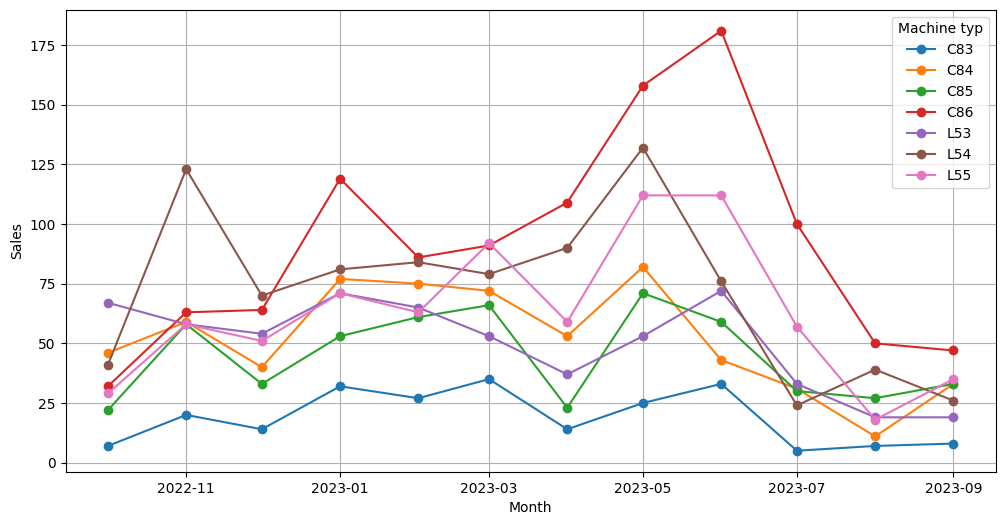

In [327]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_sales_by_type(df, maschinentyp_column, month_column, sales_column):
    # Konvertiere Period zu Timestamp, wenn nötig
    if pd.api.types.is_period_dtype(df[month_column]):
        df[month_column] = df[month_column].dt.to_timestamp()
    
    # Gruppieren der Daten nach Maschinentyp
    grouped = df.groupby(maschinentyp_column)
    
    # Erstellen eines Plots für jeden Maschinentyp
    plt.figure(figsize=(12, 6))
    for name, group in grouped:
        # Sortieren der Daten nach dem Monat für einen kontinuierlichen Plot
        group = group.sort_values(by=month_column)
        plt.plot(group[month_column], group[sales_column], marker='o', linestyle='-', label=name)

    #plt.title('Verkäufe nach Maschinentyp über die Zeit')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.legend(title="Machine typ")
    plt.grid(True)
    plt.show()

# Angenommen, Ihr DataFrame heißt merged_df und die Spaltennamen sind korrekt
plot_sales_by_type(merged_df, 'Maschinentyp', 'Monat', 'Sales')


## Data Investigation

In [138]:
grouped = result.groupby(['Maschinentyp'])
result = grouped.size().reset_index(name='Anzahl')


print(result)

  Maschinentyp  Anzahl
0          C83      12
1          C84      12
2          C85      12
3          C86      12
4          L53      12
5          L54      12
6          L55      12


In [650]:
def gewichteter_durchschnitt(zahlen):
    # Definieren Sie die Gewichte für jede Zahl
    gewichte = [(601/ 4708),(865 / 4708),(757 / 4708),(227 / 4708),(622 / 4708),(536 / 4708),(1100 / 4708)]  # Beispielgewichte
    if len(zahlen) != len(gewichte):
        raise ValueError("Die Länge der Zahlenliste muss der Länge der Gewichteliste entsprechen.")
    
    # Berechnen des gewichteten Durchschnitts
    gewichteter_durchschnitt = sum(z * w for z, w in zip(zahlen, gewichte)) / sum(gewichte)
    return gewichteter_durchschnitt

# Beispielaufruf der Funktion
zahlenliste = [42, 23, 28, 5, 62, 32, 17]  # Beispielzahlen
resultat = gewichteter_durchschnitt(zahlenliste)
print(resultat)




30.13678844519966


## Plot Functions

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_combined_monthly_time_series(df, maschinentyp_column, date_column):
    # Stellen Sie sicher, dass das Datum im richtigen Format ist
    df[date_column] = pd.to_datetime(df[date_column])

    # Gruppieren der Daten nach Maschinentyp und Monat
    df['Monat'] = df[date_column].dt.to_period('M')
    grouped = df.groupby([maschinentyp_column, 'Monat']).size().unstack(level=0)

    # Erstellen eines einzigen Plots für alle Maschinentypen
    plt.figure(figsize=(12, 6))

    # Durch jede Maschinentyp-Spalte iterieren und plotten
    for maschinentyp in grouped.columns:
        monthly_data = grouped[maschinentyp].dropna()
        monthly_data.index = monthly_data.index.to_timestamp()
        plt.plot(monthly_data.index, monthly_data, marker='o', label=maschinentyp)

    plt.title('Verkäufe über ein Geschäftsjahr aller Maschinentypen')
    plt.xlabel('Monat')
    plt.ylabel('Anzahl')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # sorgt dafür, dass das Layout passt, auch mit der Legende
    plt.show()




In [49]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_monthly_time_series(df, maschinentyp_column, untertyptyp_column, date_column):
    # Datum in das richtige Format konvertieren
    df[date_column] = pd.to_datetime(df[date_column])
    
    # Daten nach Maschinentyp und Monat gruppieren
    df['Monat'] = df[date_column].dt.to_period('M')
    
    # Für jeden Maschinentyp die Daten gruppieren und plotten
    maschinentypen = df[maschinentyp_column].unique()
    for maschinentyp in maschinentypen:
        # Daten nach Untertyp filtern
        df_filtered = df[df[maschinentyp_column] == maschinentyp]
        
        # Daten nach Untertyp und Monat gruppieren
        grouped = df_filtered.groupby([untertyptyp_column, 'Monat']).size().unstack(level=0)
        
        # Plot für den aktuellen Maschinentyp erstellen
        plt.figure(figsize=(12, 6))
        ax = grouped.plot(kind='line', marker='o')
        
        # Titel und Achsenbeschriftungen setzen
        plt.title(f'Monatliche Versandzahlen für {maschinentyp}')
        plt.xlabel('Monat')
        plt.ylabel('Anzahl der Versandungen')
        plt.grid(True)
        
        # Legende rechts außerhalb des Plots positionieren
        plt.legend(title='Untertyp', loc='center left', bbox_to_anchor=(1, 0.5))
        
        # Layout anpassen, um Platz für die Legende zu machen
        #plt.subplots_adjust(right=0.99)
        
        # Plot anzeigen
        plt.show()


## Plots

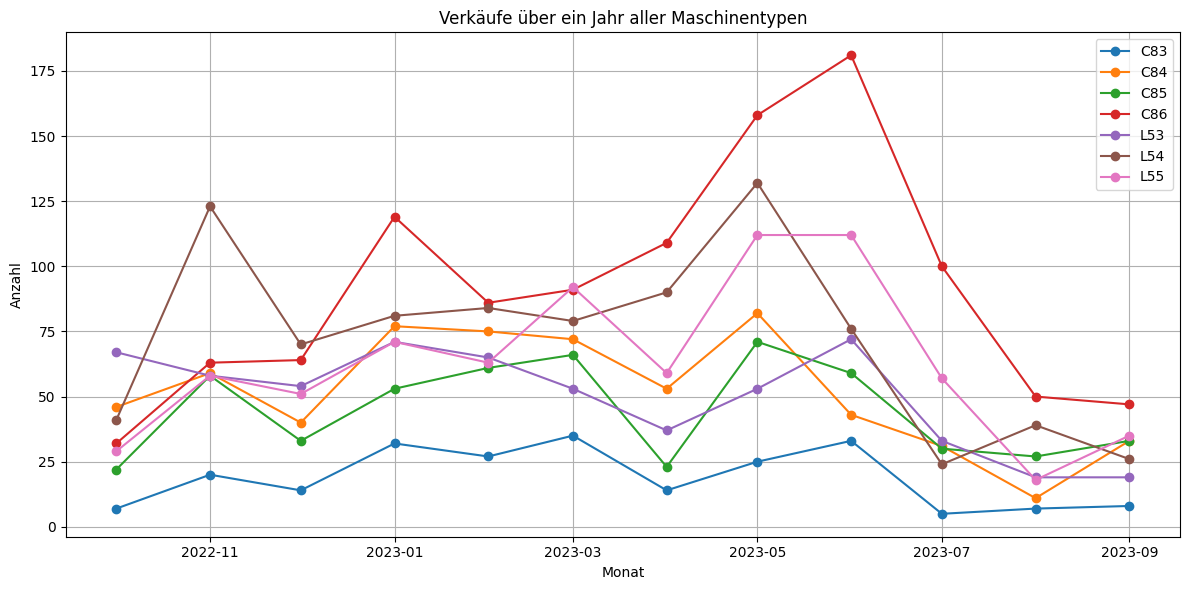

In [262]:
plot_combined_monthly_time_series(sales, 'Maschinentyp', 'Versanddatum')

<Figure size 1200x600 with 0 Axes>

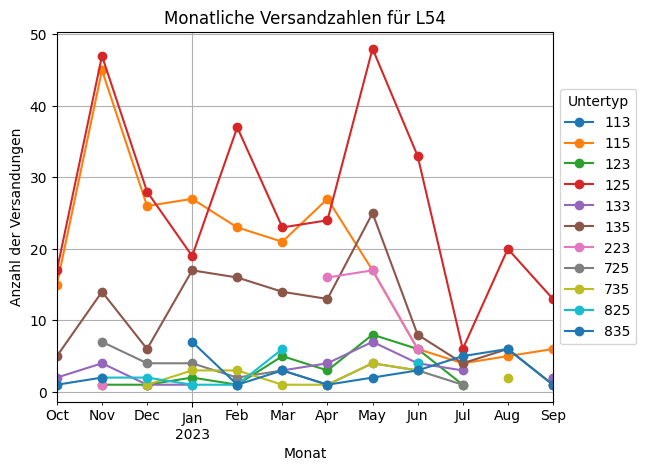

<Figure size 1200x600 with 0 Axes>

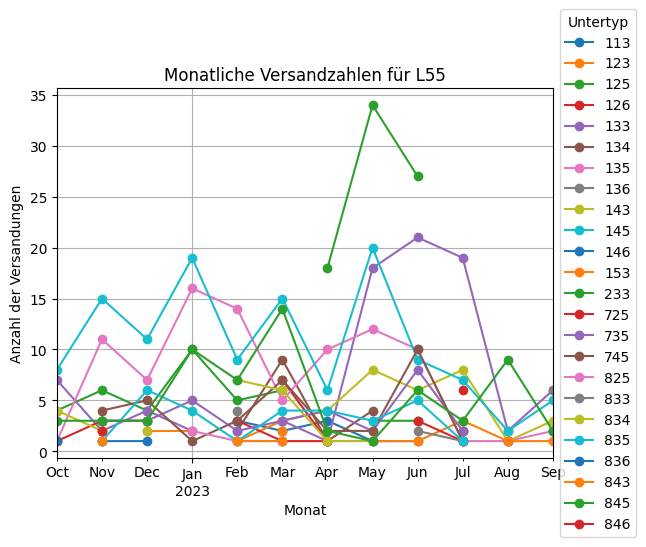

<Figure size 1200x600 with 0 Axes>

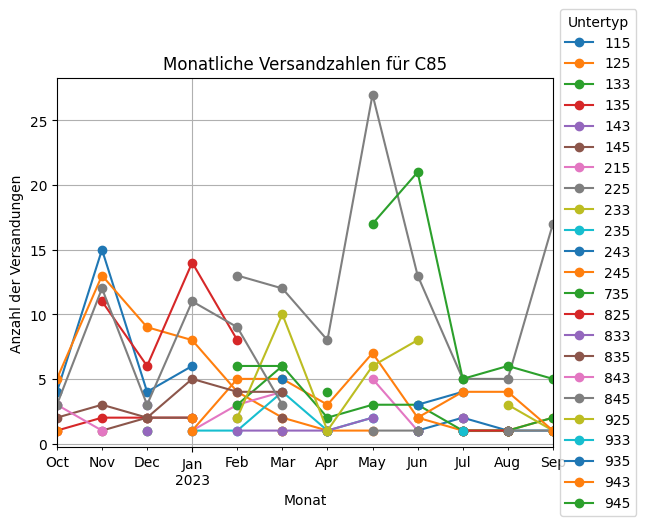

<Figure size 1200x600 with 0 Axes>

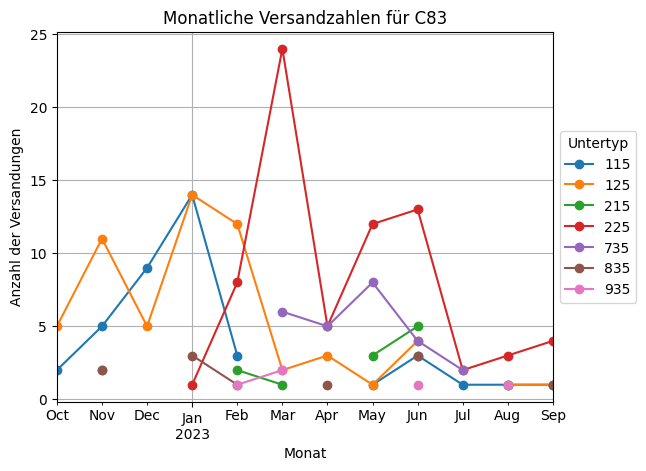

<Figure size 1200x600 with 0 Axes>

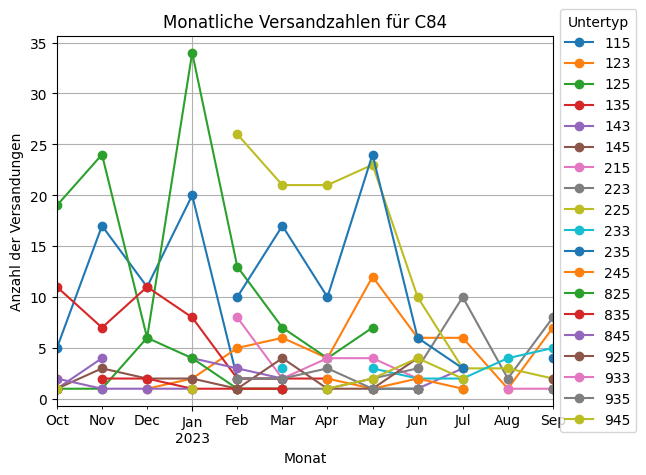

<Figure size 1200x600 with 0 Axes>

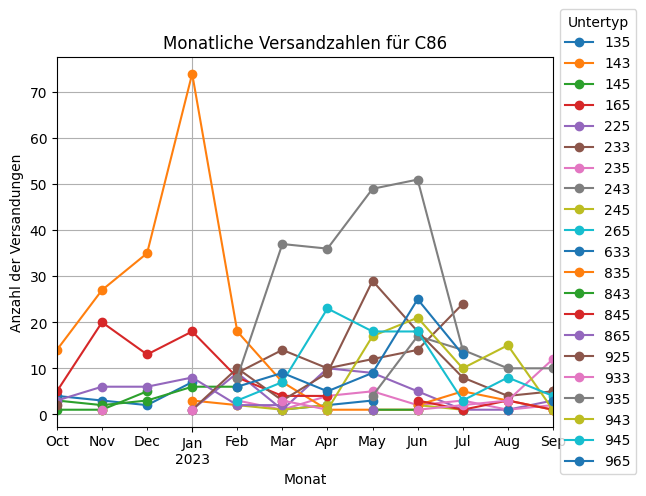

<Figure size 1200x600 with 0 Axes>

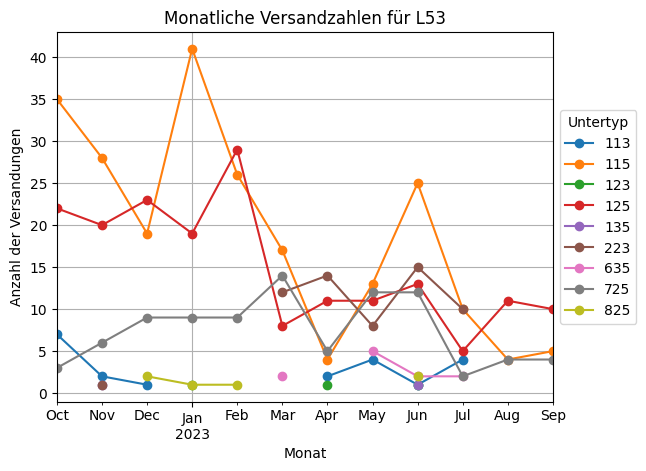

In [57]:
plot_monthly_time_series(sales, 'Maschinentyp', 'Untertyp', 'Versanddatum')

In [ ]:
plot_combined_monthly_time_series(df, 'Maschinentyp', 'Monat')


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_combined_monthly_time_seriesU(df, maschinentyp_column, untertyptyp_column, date_column):
    # Stellen Sie sicher, dass das Datum im richtigen Format ist
    df[date_column] = pd.to_datetime(df[date_column])

    # Gruppieren der Daten nach Maschinentyp und Monat
    df['Monat'] = df[date_column].dt.to_period('M')
    
    # Daten nach Untertyp und Monat gruppieren
    grouped = df_filtered.groupby([untertyptyp_column, 'Monat']).size().unstack(level=0)

    # Erstellen eines einzigen Plots für alle Maschinentypen
    plt.figure(figsize=(12, 6))

    # Durch jede Maschinentyp-Spalte iterieren und plotten
    for maschinentyp in grouped.columns:
        monthly_data = grouped[maschinentyp].dropna()
        monthly_data.index = monthly_data.index.to_timestamp()
        plt.plot(monthly_data.index, monthly_data, marker='o', label=maschinentyp)

    plt.title('Verkäufe über ein Geschäftsjahr aller Maschinentypen')
    plt.xlabel('Monat')
    plt.ylabel('Anzahl')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # sorgt dafür, dass das Layout passt, auch mit der Legende
    plt.show()




## Data set creation

In [1]:
import pandas as pd

# Laden der Excel-Datei
excel_file = pd.ExcelFile('Fact_GJ2017_GJ2022.XLSX')

# Excel-Datei enthält mehrere Tabellenblätter
sheet_names = excel_file.sheet_names  # Liste aller Tabellenblattnamen

print(sheet_names)

# Laden jedes Tabellenblatts in ein eigenes DataFrame
dataframes = {sheet_name: excel_file.parse(sheet_name) for sheet_name in sheet_names}

['Fact_GJ2017', 'Fact_GJ2018', 'Fact_GJ2019', 'Fact_GJ2020', 'Fact_GJ2021', 'Fact_GJ2022']


In [4]:
import pandas as pd

# Laden der Excel-Datei
excel_file = pd.ExcelFile('Fact_GJ2017_GJ2022.XLSX')

# Erstellen einer Liste, um alle DataFrames zu sammeln
all_dataframes = []

# Schleife durch alle Tabellenblätter in der Excel-Datei
for sheet_name in excel_file.sheet_names:
    # Laden jedes Tabellenblatts als DataFrame
    df = excel_file.parse(sheet_name)
    # Hinzufügen des DataFrame zur Liste
    all_dataframes.append(df)

# Kombinieren aller DataFrames in der Liste zu einem einzigen DataFrame
combined_df = pd.concat(all_dataframes, ignore_index=True)

combined_df['Monat'] = combined_df['Monat'].apply(convert_int_to_datetime)

combined_df = extract_maschinentyp(combined_df, 'UTyp-Bezeichnung')

combined_df = replace_machine_types(combined_df, mapping_dict)

combined_df = combined_df[combined_df['Maschinentyp'].isin(allowed_types)]



# Anzeigen der ersten Zeilen des kombinierten DataFrame
print(combined_df.head())

num_rows = len(combined_df)

print("Anzahl der Zeilen im DataFrame:", num_rows)


   Claas-Planungsland Vertriebsregion Teil 2 Vertriebsregion Teil 4  Material  \
24                 ZA            6 Africa&ME         3 South AF Imp  20002040   
25                CPL            1 Middle EU                  3 CPL  20002040   
26                 RO            1 Middle EU              4 CRC Rom  20002040   
27                 FI            1 Middle EU              5 NEU Imp  20002040   
28                 AT            1 Middle EU              6 CRC Aus  20002040   

    CLAAS Untertyp SOP        UTyp-Bezeichnung      Monat  PG Fakt Ist  \
24                 110   C04/110 TUCANO 430 T3 2017-01-01            1   
25                 120  C04/120 TUCANO 420 T4f 2017-02-01            1   
26                 120  C04/120 TUCANO 420 T4f 2017-02-01            1   
27                 120  C04/120 TUCANO 420 T4f 2017-01-01            1   
28                 120  C04/120 TUCANO 420 T4f 2017-04-01            1   

   Maschinentyp  
24          L53  
25          L53  
26          L5

In [3]:
# Funktion zur Konvertierung eines Datums im Integer-Format
def convert_int_to_datetime(int_date):
    date_str = f"{int_date:06d}"  # Führende Nullen hinzufügen, falls nötig
    date_str = f"{date_str[:4]}-{date_str[4:]}-01"
    return pd.to_datetime(date_str, format='%Y-%m-%d', errors='coerce')

def extract_maschinentyp(df, source_column):
    # Die Annahme ist, dass der Maschinentyp das erste Wort im String ist,
    # getrennt durch ein Leerzeichen vom Rest des Strings.
    df['Maschinentyp'] = df[source_column].str.split('/').str[0]

    return df

def replace_machine_types(df, mapping):
    df['Maschinentyp'] = df['Maschinentyp'].map(mapping).fillna(df['Maschinentyp'])
    return df

mapping = {
    'Type old': ['L02', 'L04', 'L05', 'L06', 'L07', 'L31', 'L32', 'L33', 'L34', 'L35', 
                 'L36', 'L37', 'L39', 'C02', 'C03', 'C04', 'C05', 'C07', 'C55', 'C59', 
                 'C65', 'C66', 'C73', 'C74', 'C75', 'C76'],
    'Type new': ['EVION', 'L53', 'L54', 'L55', 'L55', 'L54', 'EVION', 'EVION', 'L53', 'L54', 
                 'L55', 'L55', 'EVION', 'EVION', 'EVION', 'L53', 'L54', 'L55', 'C85', 'C86', 
                 'C85', 'C86', 'C83', 'C84', 'C85', 'C86']
}
df_mapping = pd.DataFrame(mapping)
mapping_dict = dict(zip(df_mapping['Type old'], df_mapping['Type new']))

allowed_types = ['L53', 'L54', 'L55', 'C83', 'C84', 'C85', 'C86']





In [5]:
df_grouped = combined_df.groupby(['Maschinentyp', 'Monat'])['PG Fakt Ist'].sum().reset_index()
df_grouped.rename(columns={'PG Fakt Ist': 'Anzahl'}, inplace=True)

print(df_grouped)


    Maschinentyp      Monat  Anzahl
0            C83 2016-11-01       6
1            C83 2016-12-01       1
2            C83 2017-01-01       6
3            C83 2017-02-01       5
4            C83 2017-03-01       7
..           ...        ...     ...
450          L55 2022-05-01      20
451          L55 2022-06-01      34
452          L55 2022-07-01      54
453          L55 2022-08-01      36
454          L55 2022-09-01      73

[455 rows x 3 columns]


/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_28482/931578001.py:6: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df[month_column]):


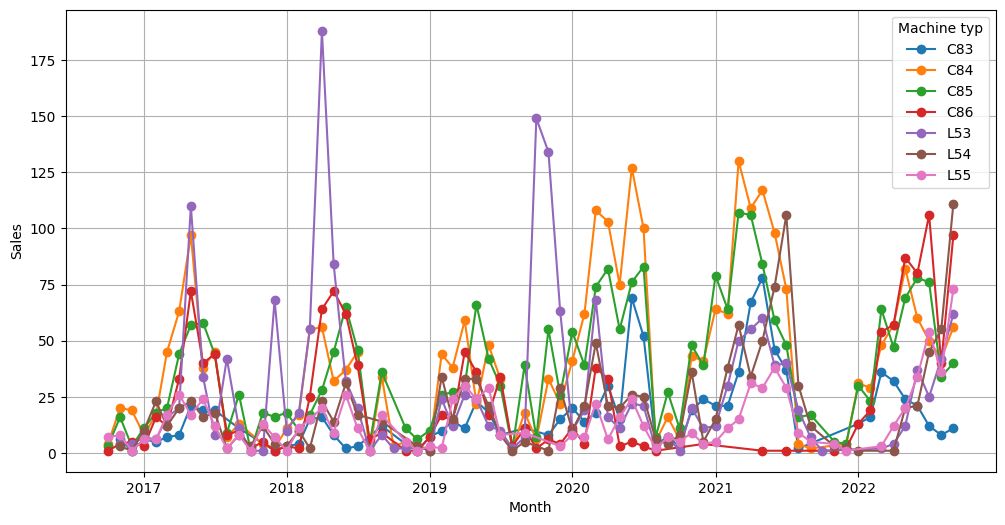

In [330]:
plot_sales_by_type(df_grouped, 'Maschinentyp', 'Monat', 'Anzahl')

In [199]:
# Extrahieren der 10 Zeilen mit den größten Werten in 'Spaltenname', inklusive aller anderen Spalten im DataFrame
top_10_rows = df_grouped.nlargest(10, 'Anzahl')

# Ausgeben der Top 10 Zeilen
print(top_10_rows)


    Maschinentyp    Monat  Anzahl
276          L53  2018-04     188
294          L53  2019-10     149
295          L53  2019-11     134
112          C84  2021-03     130
103          C84  2020-06     127
114          C84  2021-05     117
389          L54  2022-09     111
265          L53  2017-05     110
113          C84  2021-04     109
100          C84  2020-03     108


In [487]:
df_mai = df_grouped[df_grouped["Monat"] <= "2022-04"]
df_fy23ful = merged_df[merged_df["Monat"] < "2023-01"]
df_fy23ful.rename(columns={'Sales': 'Anzahl'}, inplace=True)
df_fy23ful = df_fy23ful.drop('Forecast', axis=1)

print(df_fy23ful)

df_23jan = pd.concat([df_grouped, df_fy23ful], ignore_index=True)

   Maschinentyp      Monat  Anzahl
0           C83 2022-10-01       7
1           C83 2022-11-01      20
2           C83 2022-12-01      14
12          C84 2022-10-01      46
13          C84 2022-11-01      59
14          C84 2022-12-01      40
24          C85 2022-10-01      22
25          C85 2022-11-01      58
26          C85 2022-12-01      33
36          C86 2022-10-01      32
37          C86 2022-11-01      63
38          C86 2022-12-01      64
48          L53 2022-10-01      67
49          L53 2022-11-01      58
50          L53 2022-12-01      54
60          L54 2022-10-01      41
61          L54 2022-11-01     123
62          L54 2022-12-01      70
72          L55 2022-10-01      29
73          L55 2022-11-01      58
74          L55 2022-12-01      51


/var/folders/72/wtk5zn4j7qzfk4nhglnbm5vh0000gp/T/ipykernel_28482/2866331316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fy23ful.rename(columns={'Sales': 'Anzahl'}, inplace=True)


In [ ]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def exponential_smoothing_forecast(df, maschinentyp_column, month_column, sales_column, forecast_periods):
    # Konvertiere das Monatsfeld in Datumsformat, falls nötig
    df[month_column] = pd.to_datetime(df[month_column])
    
    # Gruppieren der Daten nach Maschinentyp
    grouped = df.groupby(maschinentyp_column)
    
    # Erstellen eines Wörterbuchs, um die Vorhersagen für jeden Typ zu speichern
    forecasts = {}
    
    # Durchlaufen der Gruppen und Anwenden der exponentiellen Glättung
    for name, group in grouped:
        # Sortieren der Daten nach dem Datum
        group = group.sort_values(by=month_column)
        # Einstellen des Monats als Index für Zeitreihenanalysen
        group.set_index(month_column, inplace=True)
        
        # Anwenden der exponentiellen Glättung
        # Hier verwenden wir ein additives saisonales Modell, das eine jährliche Saisonkomponente berücksichtigt
        model = ExponentialSmoothing(group[sales_column], trend='add', seasonal='add', seasonal_periods=12).fit()
        
        # Prognose für die gewünschten Perioden erstellen
        forecast = model.forecast(forecast_periods).round(0)
        forecast = forecast.clip(lower=0)
        
        # Speichern der Prognose im Wörterbuch
        forecasts[name] = forecast
    
    return forecasts

# Beispiel für die Nutzung der Funktion:
forecasts = exponential_smoothing_forecast(df_mai, 'Maschinentyp', 'Monat', 'Anzahl',17)
for maschinentyp, forecast in forecasts.items():
    print(f'{maschinentyp}: {forecast.iloc[0]}')



In [ ]:
#fore = forecasts["C86"].reset_index(drop=True) #fore = forecasts["C86"].iloc[5:].reset_index(drop=True)
fore = forecasts["L53"].iloc[5:].reset_index(drop=True)
print(fore)

In [ ]:
#sal1 = merged_df[merged_df["Monat"] >= "2023-01"]
#sal = sal1[sal1["Maschinentyp"] == "L53"].reset_index(drop=True)
sal = merged_df[merged_df["Maschinentyp"] == "L53"].reset_index(drop=True)


print(sal["Sales"])

In [516]:
print(mean_absolute_error(fore, sal["Sales"]).round(0))
print(np.mean(np.abs((fore  - sal['Sales']) / sal['Sales'])) * 100)

30.0
29.647854133818658


In [607]:
print((fore.sum() - sal["Sales"].sum()))
print((fore.sum() - sal["Sales"].sum())/ sal["Sales"].sum() * 100)

-483.0
-80.36605657237936


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def exponential_smoothing_forecast(df, maschinentyp_column, month_column, sales_column, forecast_periods):
    # Konvertiere das Monatsfeld in Datumsformat, falls nötig
    df[month_column] = pd.to_datetime(df[month_column])
    
    # Gruppieren der Daten nach Maschinentyp
    grouped = df.groupby(maschinentyp_column)
    
    # Durchlaufen der Gruppen und Anwenden der exponentiellen Glättung
    for name, group in grouped:
        # Sortieren der Daten nach dem Datum
        group = group.sort_values(by=month_column)
        # Einstellen des Monats als Index für Zeitreihenanalysen
        group.set_index(month_column, inplace=True)
        
        # Anwenden der exponentiellen Glättung
        # Hier verwenden wir ein additives saisonales Modell, das eine jährliche Saisonkomponente berücksichtigt
        model = ExponentialSmoothing(group[sales_column], trend='mul', seasonal="add", seasonal_periods=12).fit()
        
        # Prognose für die gewünschten Perioden erstellen
        forecast = model.forecast(forecast_periods)
        forecast = forecast.clip(lower=0)
        
        # Plotting der historischen Daten
        plt.figure(figsize=(10, 5))
        plt.plot(group.index, group[sales_column], label='Historical Sales', marker='o')
        
        # Plotting der Prognose
        forecast_dates = pd.date_range(start=group.index[-1], periods=forecast_periods+1, freq='M')[1:]
        plt.plot(forecast_dates, forecast, label='Forecast', linestyle='--', marker='x')
        
        plt.title(f'Sales Forecast for {name}')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.legend()
        plt.grid(True)
        plt.show()

# Beispiel für die Nutzung der Funktion:
# Angenommen, Ihr DataFrame heißt df_grouped und die Spaltennamen sind korrekt
exponential_smoothing_forecast(df_23jan, 'Maschinentyp', 'Monat', 'Anzahl', 9)


## Maschine Learning

In [2]:
# Function to convert an integer-formatted date into a datetime object
def convert_int_to_datetime(int_date):
    # Add leading zeros to the integer to ensure it's in a consistent format
    date_str = f"{int_date:06d}"  
    # Reformat the string to a date in 'YYYY-MM' format with the first day of the month
    date_str = f"{date_str[:4]}-{date_str[4:]}-01"  
    # Convert the formatted string into a datetime object
    return pd.to_datetime(date_str, format='%Y-%m-%d', errors='coerce')

# Function to extract the machine type from a specified column in a DataFrame
def extract_maschinentyp(df, source_column):
    # Assumption is that the machine type is the first word in the string,
    # separated by a space from the rest of the string
    df['Maschinentyp'] = df[source_column].str.split('/').str[0]  # Split and take the first part

    return df

# Function to extract the sub-type from a specified column in a DataFrame
#def extract_subtype(df, source_column):
    # Assumption is that the sub-type is the second word in the string,
    # separated by a space from the rest of the string
    df['Subtype'] = df[source_column].str.split().str[0].str.split('/').str[1]

    return df

# Function to replace old machine type identifiers with new ones according to a mapping
def replace_machine_types(df, mapping):
    # Use the provided mapping to replace machine types,
    # falling back to the original if no mapping is found (using fillna)
    df['Maschinentyp'] = df['Maschinentyp'].map(mapping).fillna(df['Maschinentyp'])
    return df

# Dictionary of old machine type identifiers mapped to new ones
mapping = {
    'Type old': ['L02', 'L04', 'L05', 'L06', 'L07', 'L31', 'L32', 'L33', 'L34', 'L35', 
                 'L36', 'L37', 'L39', 'C02', 'C03', 'C04', 'C05', 'C07', 'C55', 'C59', 
                 'C65', 'C66', 'C73', 'C74', 'C75', 'C76'],
    'Type new': ['EVION', 'L53', 'L54', 'L55', 'L55', 'L54', 'EVION', 'EVION', 'L53', 'L54', 
                 'L55', 'L55', 'EVION', 'EVION', 'EVION', 'L53', 'L54', 'L55', 'C85', 'C86', 
                 'C85', 'C86', 'C83', 'C84', 'C85', 'C86']
}

# Create a DataFrame from the mapping dictionary
df_mapping = pd.DataFrame(mapping)

# Convert the mapping DataFrame into a dictionary for easy replacement
mapping_dict = dict(zip(df_mapping['Type old'], df_mapping['Type new']))

# List of allowed machine types
allowed_types = ['L53', 'L54', 'L55', 'C83', 'C84', 'C85', 'C86']

In [3]:
import pandas as pd

# Load the Excel file
excel_file = pd.ExcelFile('Fact_GJ2017_GJ2022.XLSX')

# Create a list to collect all DataFrames
all_dataframes = []

# Loop through all sheet names in the Excel file
for sheet_name in excel_file.sheet_names:
    # Load each sheet as a DataFrame
    df = excel_file.parse(sheet_name)
    # Add the DataFrame to the list
    all_dataframes.append(df)

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(all_dataframes, ignore_index=True)

# Apply the function 'convert_int_to_datetime' to convert the 'Monat' column to a datetime format
combined_df['Monat'] = combined_df['Monat'].apply(convert_int_to_datetime)

# Extract the machine type from a specified column in the DataFrame
combined_df = extract_maschinentyp(combined_df, 'UTyp-Bezeichnung')

# Extract the sub-type from a specified column in the DataFrame
#combined_df = extract_subtype(combined_df, 'UTyp-Bezeichnung')

# Replace machine types based on the provided mapping dictionary
combined_df = replace_machine_types(combined_df, mapping_dict)

# Filter the DataFrame to keep only the allowed machine types
combined_df = combined_df[combined_df['Maschinentyp'].isin(allowed_types)]

# Display the first few rows of the combined DataFrame
print(combined_df.head())

# Get the total number of rows in the DataFrame
num_rows = len(combined_df)

# Display the total number of rows
print("Number of rows in the DataFrame:", num_rows)

   Claas-Planungsland Vertriebsregion Teil 2 Vertriebsregion Teil 4  Material  \
24                 ZA            6 Africa&ME         3 South AF Imp  20002040   
25                CPL            1 Middle EU                  3 CPL  20002040   
26                 RO            1 Middle EU              4 CRC Rom  20002040   
27                 FI            1 Middle EU              5 NEU Imp  20002040   
28                 AT            1 Middle EU              6 CRC Aus  20002040   

    CLAAS Untertyp SOP        UTyp-Bezeichnung      Monat  PG Fakt Ist  \
24                 110   C04/110 TUCANO 430 T3 2017-01-01            1   
25                 120  C04/120 TUCANO 420 T4f 2017-02-01            1   
26                 120  C04/120 TUCANO 420 T4f 2017-02-01            1   
27                 120  C04/120 TUCANO 420 T4f 2017-01-01            1   
28                 120  C04/120 TUCANO 420 T4f 2017-04-01            1   

   Maschinentyp  
24          L53  
25          L53  
26          L5

In [43]:
grouped_df = combined_df.groupby(['Maschinentyp', 'Monat'])

# Summiere die 'PG Fakt Ist' Spalte
result = grouped_df['PG Fakt Ist'].sum().reset_index()  # Verwende reset_index, um den Index zurückzusetzen
result.rename(columns={'PG Fakt Ist': 'Anzahl'}, inplace=True)


print(result)

    Maschinentyp      Monat  Anzahl
0            C83 2016-11-01       6
1            C83 2016-12-01       1
2            C83 2017-01-01       6
3            C83 2017-02-01       5
4            C83 2017-03-01       7
..           ...        ...     ...
450          L55 2022-05-01      20
451          L55 2022-06-01      34
452          L55 2022-07-01      54
453          L55 2022-08-01      36
454          L55 2022-09-01      73

[455 rows x 3 columns]


In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Nehmen wir an, dein DataFrame heißt 'df'
# df = pd.read_csv('deine_daten.csv')  # Beispiel: Laden deiner Daten

# Umwandlung der 'Monat' Spalte in Datetime-Objekte und setzen als Index
#sales_gr['Monat'] = pd.to_datetime(df['Monat'])
df_nn = result.copy()
df_nn.set_index('Monat', inplace=True)

# Wähle nur die Daten für den Maschinentyp 'C83'
df_c83 = df_nn[df_nn['Maschinentyp'] == 'C83'].copy()

# Skalieren der Sales-Daten
scaler = MinMaxScaler()
df_c83['Anzahl'] = scaler.fit_transform(df_c83[['Anzahl']])

# Angenommen, du hast die 'timesteps' und 'features' bereits definiert
timesteps = 12  # Anzahl der Zeitschritte in deiner Sequenz
features = 1    # Anzahl der Features (nur Sales in diesem Fall)

# Aufteilung der Daten in Trainings- und Testsets
# Die Aufteilung könnte zum Beispiel basierend auf einem Datum erfolgen
if not isinstance(df_c83.index, pd.DatetimeIndex):
    df_c83.index = df_c83.index.to_timestamp()

# Aufteilung der Daten in Trainings- und Testsets
# Die Aufteilung könnte zum Beispiel basierend auf einem Datum erfolgen
split_date = pd.Timestamp('2022-01-01')
train_data = df_c83.loc[df_c83.index < split_date]
test_data = df_c83.loc[df_c83.index >= split_date]

# Erstellung des Generators für die Trainingsdaten
train_generator = TimeseriesGenerator(train_data['Anzahl'].values, train_data['Anzahl'].values,
                                      length=timesteps, batch_size=1)

# Erstellung und Kompilierung des GRU-Modells
model = Sequential([
    GRU(100, input_shape=(timesteps, features), return_sequences=True),
    Dropout(0.2),
    GRU(50),
    Dropout(0.2),
    Dense(1, activation='linear')
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Training des Modells mit dem Trainingsgenerator
model.fit(train_generator, epochs=100)


Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0741
Epoch 2/100
 1/39 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0038

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0521
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0484
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0503
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0536
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0372
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0573
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0519
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0512
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0254
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0332
Epoch 12/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0480
Epoch 13/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0450
Epoch 14/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0163
Epoch 15/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0287  
Epoch 16/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0333
Epoch 17/100


In [15]:
import numpy as np

# Funktion zur Vorhersage der Verkäufe für die nächsten Monate
def predict_future_sales(model, initial_sequence, num_future_months):
    # Speichert die vorhergesagten Werte
    future_predictions = []

    # Die Eingabesequenz, die verwendet wird, um Vorhersagen zu treffen
    current_sequence = initial_sequence.copy()

    for _ in range(num_future_months):
        # Mache eine Vorhersage
        prediction = model.predict(current_sequence)#.reshape(1, timesteps, features))

        # Speichere die Vorhersage
        future_predictions.append(prediction[0][0])

        # Aktualisiere die Eingabesequenz, indem du den ältesten Wert entfernst und den neuesten hinzufügst
        current_sequence = np.append(current_sequence[1:], prediction)

    return future_predictions

# Startdatum: Oktober 2022
start_date = "2022-10-01"

# Enddatum: September 2023
end_date = "2023-09-30"

# Erstelle eine monatliche Sequenz vom Start- bis zum Enddatum
monthly_sequence = pd.date_range(start=start_date, end=end_date, freq='MS')  # 'MS' steht für 'Month Start'

# Vorhersagen der nächsten 6 Monate
num_future_months = 6
future_sales = predict_future_sales(model, monthly_sequence, num_future_months)

print("Vorhersagte Verkäufe für die nächsten Monate:", future_sales)


ValueError: Invalid dtype: datetime64[ns]

In [20]:
# Beispiel DataFrame mit monatlichen Verkaufsdaten
date_range = pd.date_range("2022-10-01", "2023-09-01", freq="MS")
sales_data = np.random.randint(10, 100, len(date_range))

df = pd.DataFrame({
    'Monat': date_range,
    'Verkäufe': sales_data
})

# Skalierung der Verkaufsdaten
scaler = MinMaxScaler()
df['Verkäufe'] = scaler.fit_transform(df[['Verkäufe']])

# Anzahl der Zeitschritte in deiner Sequenz
timesteps = 12
features = 1

# Erstellung eines Generators für die Vorhersage
forecast_generator = TimeseriesGenerator(
    df['Verkäufe'].values,
    df['Verkäufe'].values,
    length=timesteps,
    batch_size=1,
    stride=1
)

# Vorhersagen mit dem Modell
future_predictions = []
for batch in forecast_generator:
    # Verwende das Modell für die Vorhersage
    prediction = model.predict(batch[0].reshape(1, timesteps, features))
    future_predictions.append(prediction[0][0])

# Rückskalierung der Vorhersagen
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

print("Vorhersagte Verkäufe:", future_predictions)

ValueError: `start_index+length=12 > end_index=11` is disallowed, as no part of the sequence would be left to be used as current step.

In [21]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

# Beispiel: DataFrame mit Verkäufen
date_range = pd.date_range("2022-01-01", "2023-12-01", freq="MS")
sales_data = np.random.randint(10, 100, len(date_range))

df = pd.DataFrame({
    'Monat': date_range,
    'Verkäufe': sales_data
})

# Skalieren der Verkaufsdaten
scaler = MinMaxScaler()
df['Verkäufe'] = scaler.fit_transform(df[['Verkäufe']])

# Anzahl der Zeitschritte (mindestens 1 weniger als die Anzahl der Daten)
timesteps = 6  # Reduziert, um den Fehler zu vermeiden
features = 1

# Erstellung des Generators für die Vorhersage
forecast_generator = TimeseriesGenerator(
    df['Verkäufe'].values,
    df['Verkäufe'].values,
    length=timesteps,
    batch_size=1,
    stride=1
)

# Funktion zur Vorhersage zukünftiger Verkäufe
def predict_future_sales(model, generator):
    future_predictions = []

    for batch in generator:
        prediction = model.predict(batch[0].reshape(1, timesteps, features))
        future_predictions.append(prediction[0][0])

    return future_predictions

# Vorhersagen mit dem korrigierten Generator
future_sales = predict_future_sales(model, forecast_generator)

# Rückskalieren der Vorhersagen
future_sales = scaler.inverse_transform(np.array(future_sales).reshape(-1, 1))

print("Vorhersagte Verkäufe:", future_sales)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Vorhersagte Verkäufe: [[24.638968]
 [34.3928  ]
 [46.647697]
 [36.489853]
 [55.03532 ]
 [23.567093]
 [26.394289]
 [23.286787]
 [42.056725]
 [34.663414]
 [23.924782]
 [30.71949 ]
 [32.849724]
 [30.867128]
 [24.075764]
 [36.870567]
 [50.794636]
 [33.783127]]


In [29]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

# Beispiel: DataFrame mit monatlichen Verkaufsdaten
date_range = pd.date_range("2022-10-01", "2023-09-01", freq="MS")
sales_data = np.random.randint(10, 100, len(date_range))

df = pd.DataFrame({
    'Monat': date_range,
    'Verkäufe': sales_data
})

# Skalierung der Verkaufsdaten
scaler = MinMaxScaler()
df['Verkäufe'] = scaler.fit_transform(df[['Verkäufe']])

# Anzahl der Zeitschritte
timesteps = 1
features = 1

# Erstellung des Generators für die Vorhersage
forecast_generator = TimeseriesGenerator(
    df['Verkäufe'].values,
    df['Verkäufe'].values,
    length=timesteps,
    batch_size=1,
    stride=1
)

# Funktion zur Vorhersage zukünftiger Verkäufe mit entsprechenden Daten
def predict_future_sales_with_dates(model, generator, start_date):
    future_predictions = []
    future_dates = []

    for i, batch in enumerate(generator):
        # Vorhersage
        prediction = model.predict(batch[0].reshape(1, timesteps, features))
        future_predictions.append(prediction[0][0])

        # Bestimmen des Datums für diese Vorhersage
        future_dates.append(start_date + pd.DateOffset(months=i))

    return pd.DataFrame({
        'Datum': future_dates,
        'Vorhersage': future_predictions
    })

# Startdatum für die Vorhersagen (einen Monat nach dem letzten Datum)
start_date = df['Monat'].iloc[-1] + pd.DateOffset(months=1)

# Vorhersagen erstellen
future_sales_df = predict_future_sales_with_dates(model, forecast_generator, start_date)

# Rückskalierung der Vorhersagen
future_sales_df['Vorhersage'] = scaler.inverse_transform(future_sales_df[['Vorhersage']])

print("Vorhersagte Verkäufe:")
print(future_sales_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Vorhersagte Verkäufe:
        Datum  Vorhersage
0  2023-10-01   66.603844
1  2023-11-01   40.318619
2  2023-12-01   43.767212
3  2024-01-01   28.762608
4  2024-02-01   65.860985
5  2024-03-01   29.212694
6  2024-04-01   42.597267
7  2024-05-01   46.168167
8  2024-06-01   33.968269
9  2024-07-01   38.121449
10 2024-08-01   72.670166


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


df = result.copy()
# Skalierung der 'Anzahl'-Spalte
scaler = MinMaxScaler()
df['Anzahl'] = scaler.fit_transform(df[['Anzahl']])

# Gruppierung nach "Maschinentyp"
grouped_df = df.groupby('Maschinentyp')

# Anzahl der Zeitschritte für den TimeseriesGenerator
timesteps = 12
features = 1

# Dictionary, um die Generators für jeden Maschinentyp zu speichern
generators = {}

# Erstellen eines TimeseriesGenerator für jeden Maschinentyp
for name, group in grouped_df:
    generator = TimeseriesGenerator(
        group['Anzahl'].values,
        group['Anzahl'].values,
        length=timesteps,
        batch_size=1
    )
    generators[name] = generator  # Speichern des Generators für diesen Maschinentyp

# Ausgabe der Generatoren zur Überprüfung
for name, gen in generators.items():
    print(f"Generator für Maschinentyp: {name}")
    for batch in gen:
        print("Input Sequence:", batch[0].flatten(), "Target:", batch[1].flatten())


In [34]:
# GRU-Modell erstellen
model = Sequential([
    GRU(50, input_shape=(timesteps, features), return_sequences=True),
    Dropout(0.2),
    GRU(25),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Modell kompilieren
model.compile(optimizer='adam', loss='mean_squared_error')

for name, generator in generators.items():
    model.fit(generator, epochs=20)

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0076   
Epoch 2/20
 1/48 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0614

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0126
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0102
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0106
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0101
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0113
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0055   
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0116
Epoch 9/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0078
Epoch 10/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0050
Epoch 11/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0068
Epoch 12/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0050  
Epoch 13/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073
Epoch 14/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036
Epoch 15/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041   
Epoch 16/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0087   
Epoch 17/20
48/48 

In [47]:
def get_test_sequence(dataframe, maschinentyp, start_date, timesteps):
    # Filter nach Maschinentyp und Startdatum
    filtered_df = dataframe[
        (dataframe['Maschinentyp'] == maschinentyp) & 
        (dataframe['Monat'] >= pd.to_datetime(start_date))
    ]

    # Auswahl der ersten 'timesteps' Datenpunkte nach dem Startdatum als Testsequenz
    test_sequence = filtered_df['Anzahl'].values[:timesteps]

    return test_sequence

# Beispiel: Rückgabe einer Testsequenz für 'C83' mit einer Länge von 3 ab Januar 2017
maschinentyp = 'C86'
start_date = '2021-09-01'
timesteps = 12

test_sequence = get_test_sequence(df, maschinentyp, start_date, timesteps)

print("Testsequenz für Maschinentyp:", maschinentyp, "ab", start_date)
print(test_sequence)

Testsequenz für Maschinentyp: C86 ab 2021-09-01
[0.         0.00534759 0.06417112 0.09625668 0.28342246 0.29946524
 0.45989305 0.42245989 0.56149733 0.20855615 0.51336898]
